# Cardiovascular Disease Project

## Problem Statement

To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes .

In [1]:
# Important libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing, Normalizing
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Cardiovascular Disease.csv', sep = ';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [3]:
# dataset stats
print(df.shape)

(69301, 13)


In [4]:
# All are int and float types. Understand the stats of datasframe
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Observations

#1 - No Missing values
#2 - Assuming Age is in number of days
#3 - Outliers in height
#4 - Outliers in Systolic blood pressure - ap_high
#5 - Outliers in ap_low
#6 - Seems Cholestrol and glucose are binary, will see in further analysis

### How to remove duplicates

- id is nominal so will remove it.

In [6]:
# Dropping Id 
df.drop('id', axis =1, inplace =True)

# Duplicate removal
df.drop_duplicates(inplace =True)

In [7]:
df.shape

(69277, 12)

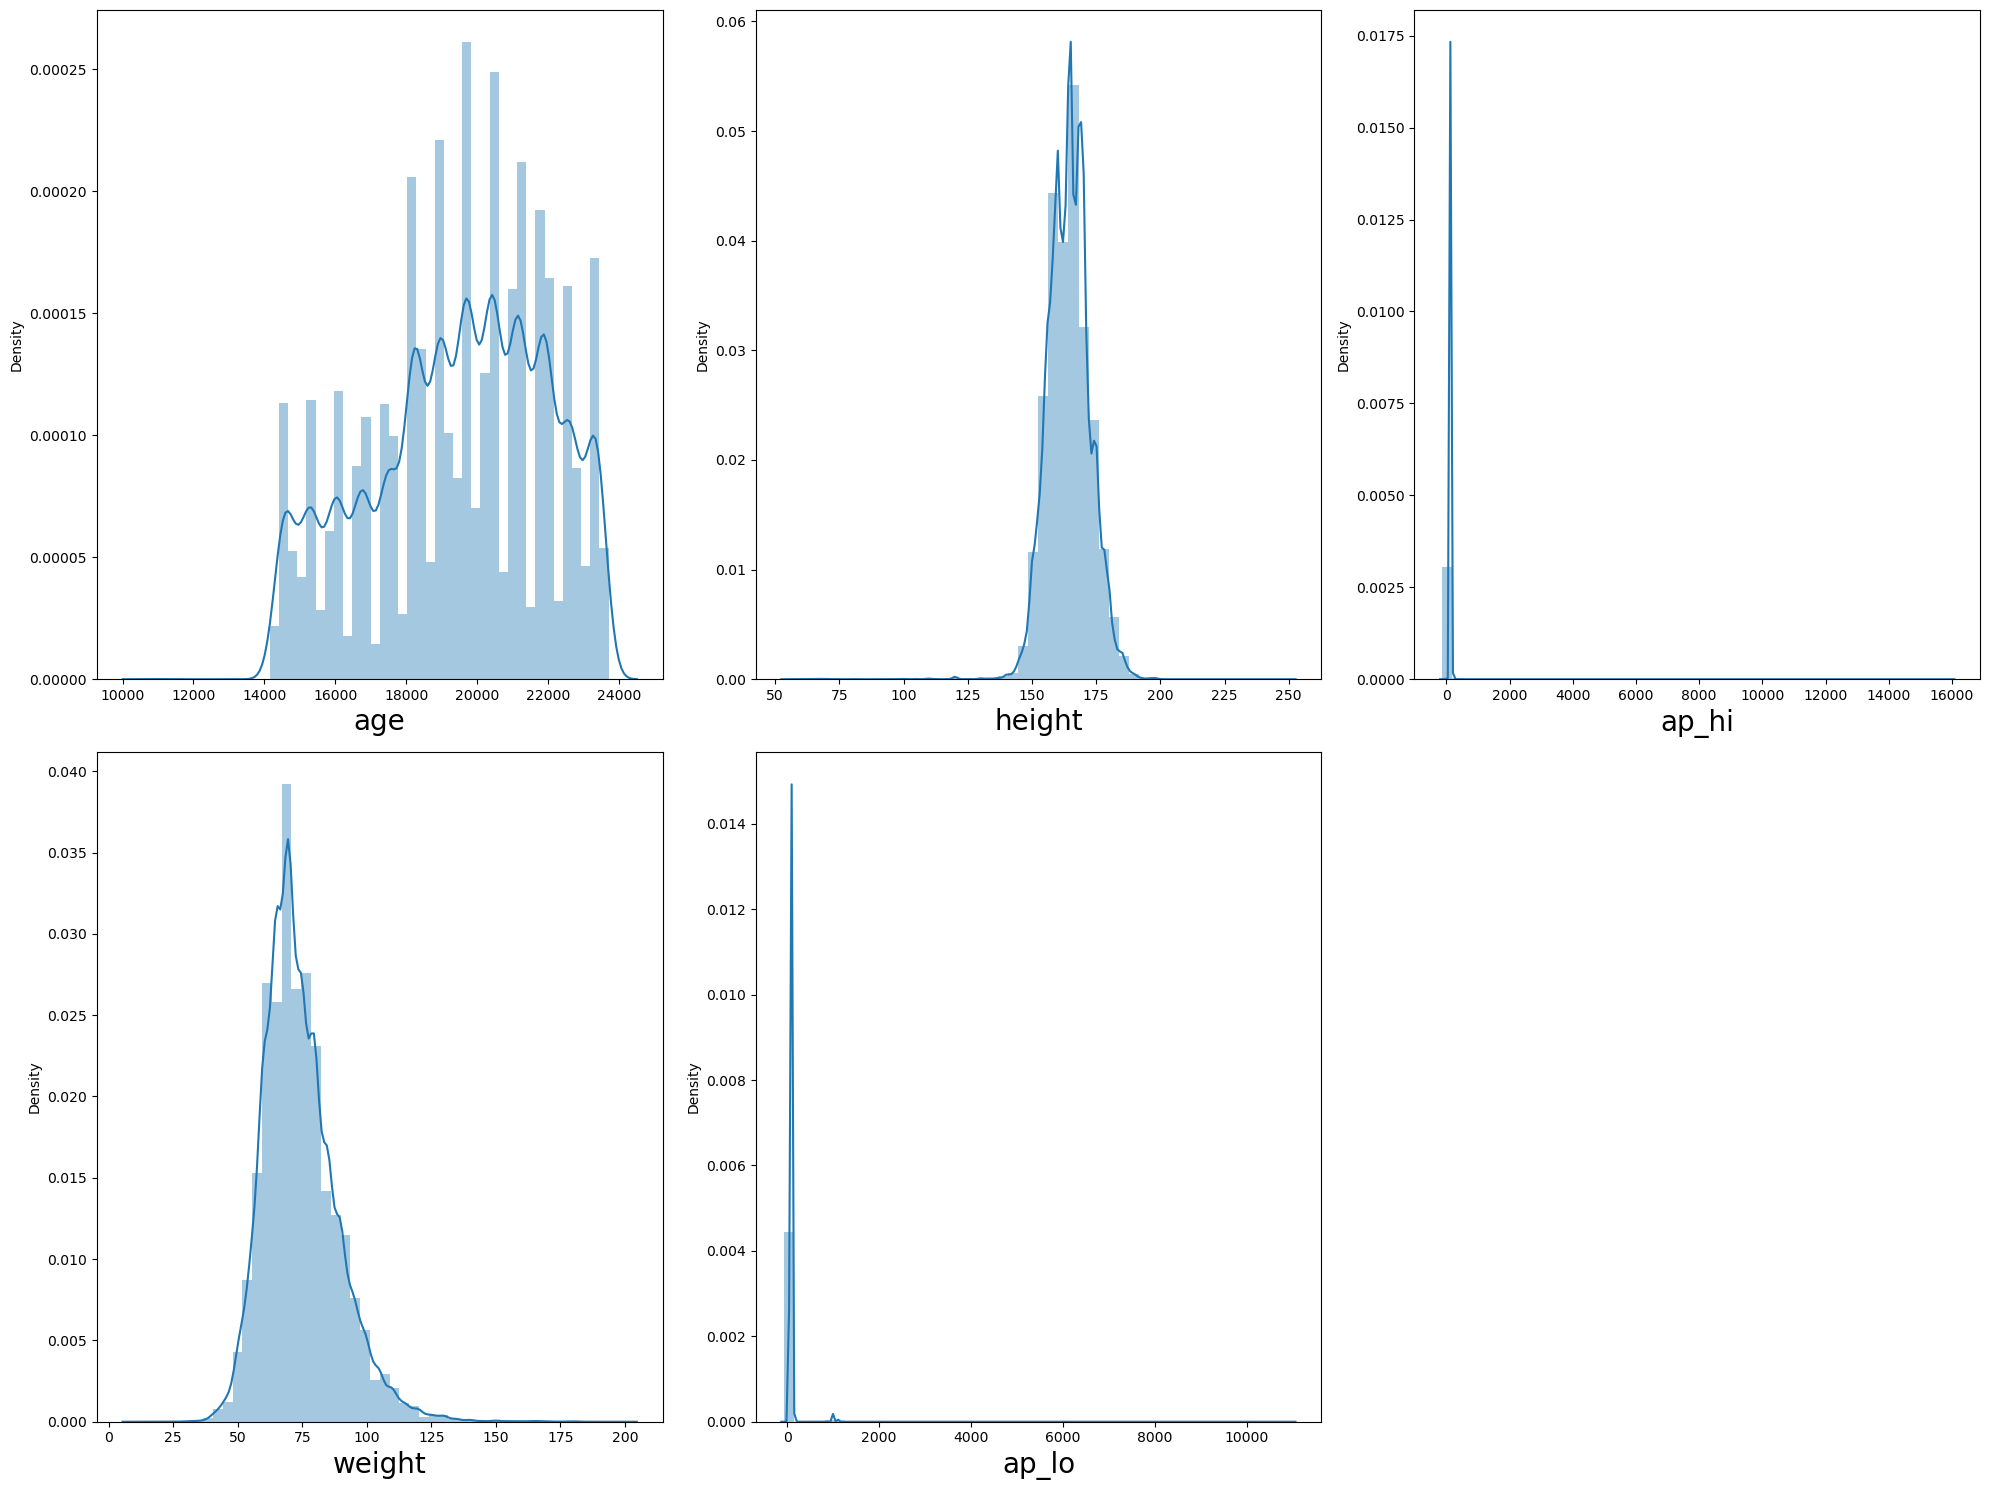

In [8]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in df[['age','height','ap_hi','weight','ap_lo']]:
    if plotnumber <= 6:
        plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.tight_layout()

Ouliers are there, so we will remove using Z-score method

In [9]:
from scipy.stats import zscore

z_score = zscore(df[['age','height','ap_hi','weight','ap_lo']])

abs_z_score = np.abs(z_score)

df = df[(abs_z_score < 3).all(axis = 1)]

df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000
mean,19466.779053,1.347268,164.374555,73.566278,126.164430,81.286001,1.362010,1.223575,0.087159,0.053281,0.803949,0.492815
std,2467.040240,0.476105,7.690310,13.195627,17.860035,10.236086,0.677075,0.569505,0.282069,0.224595,0.397011,0.499952
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


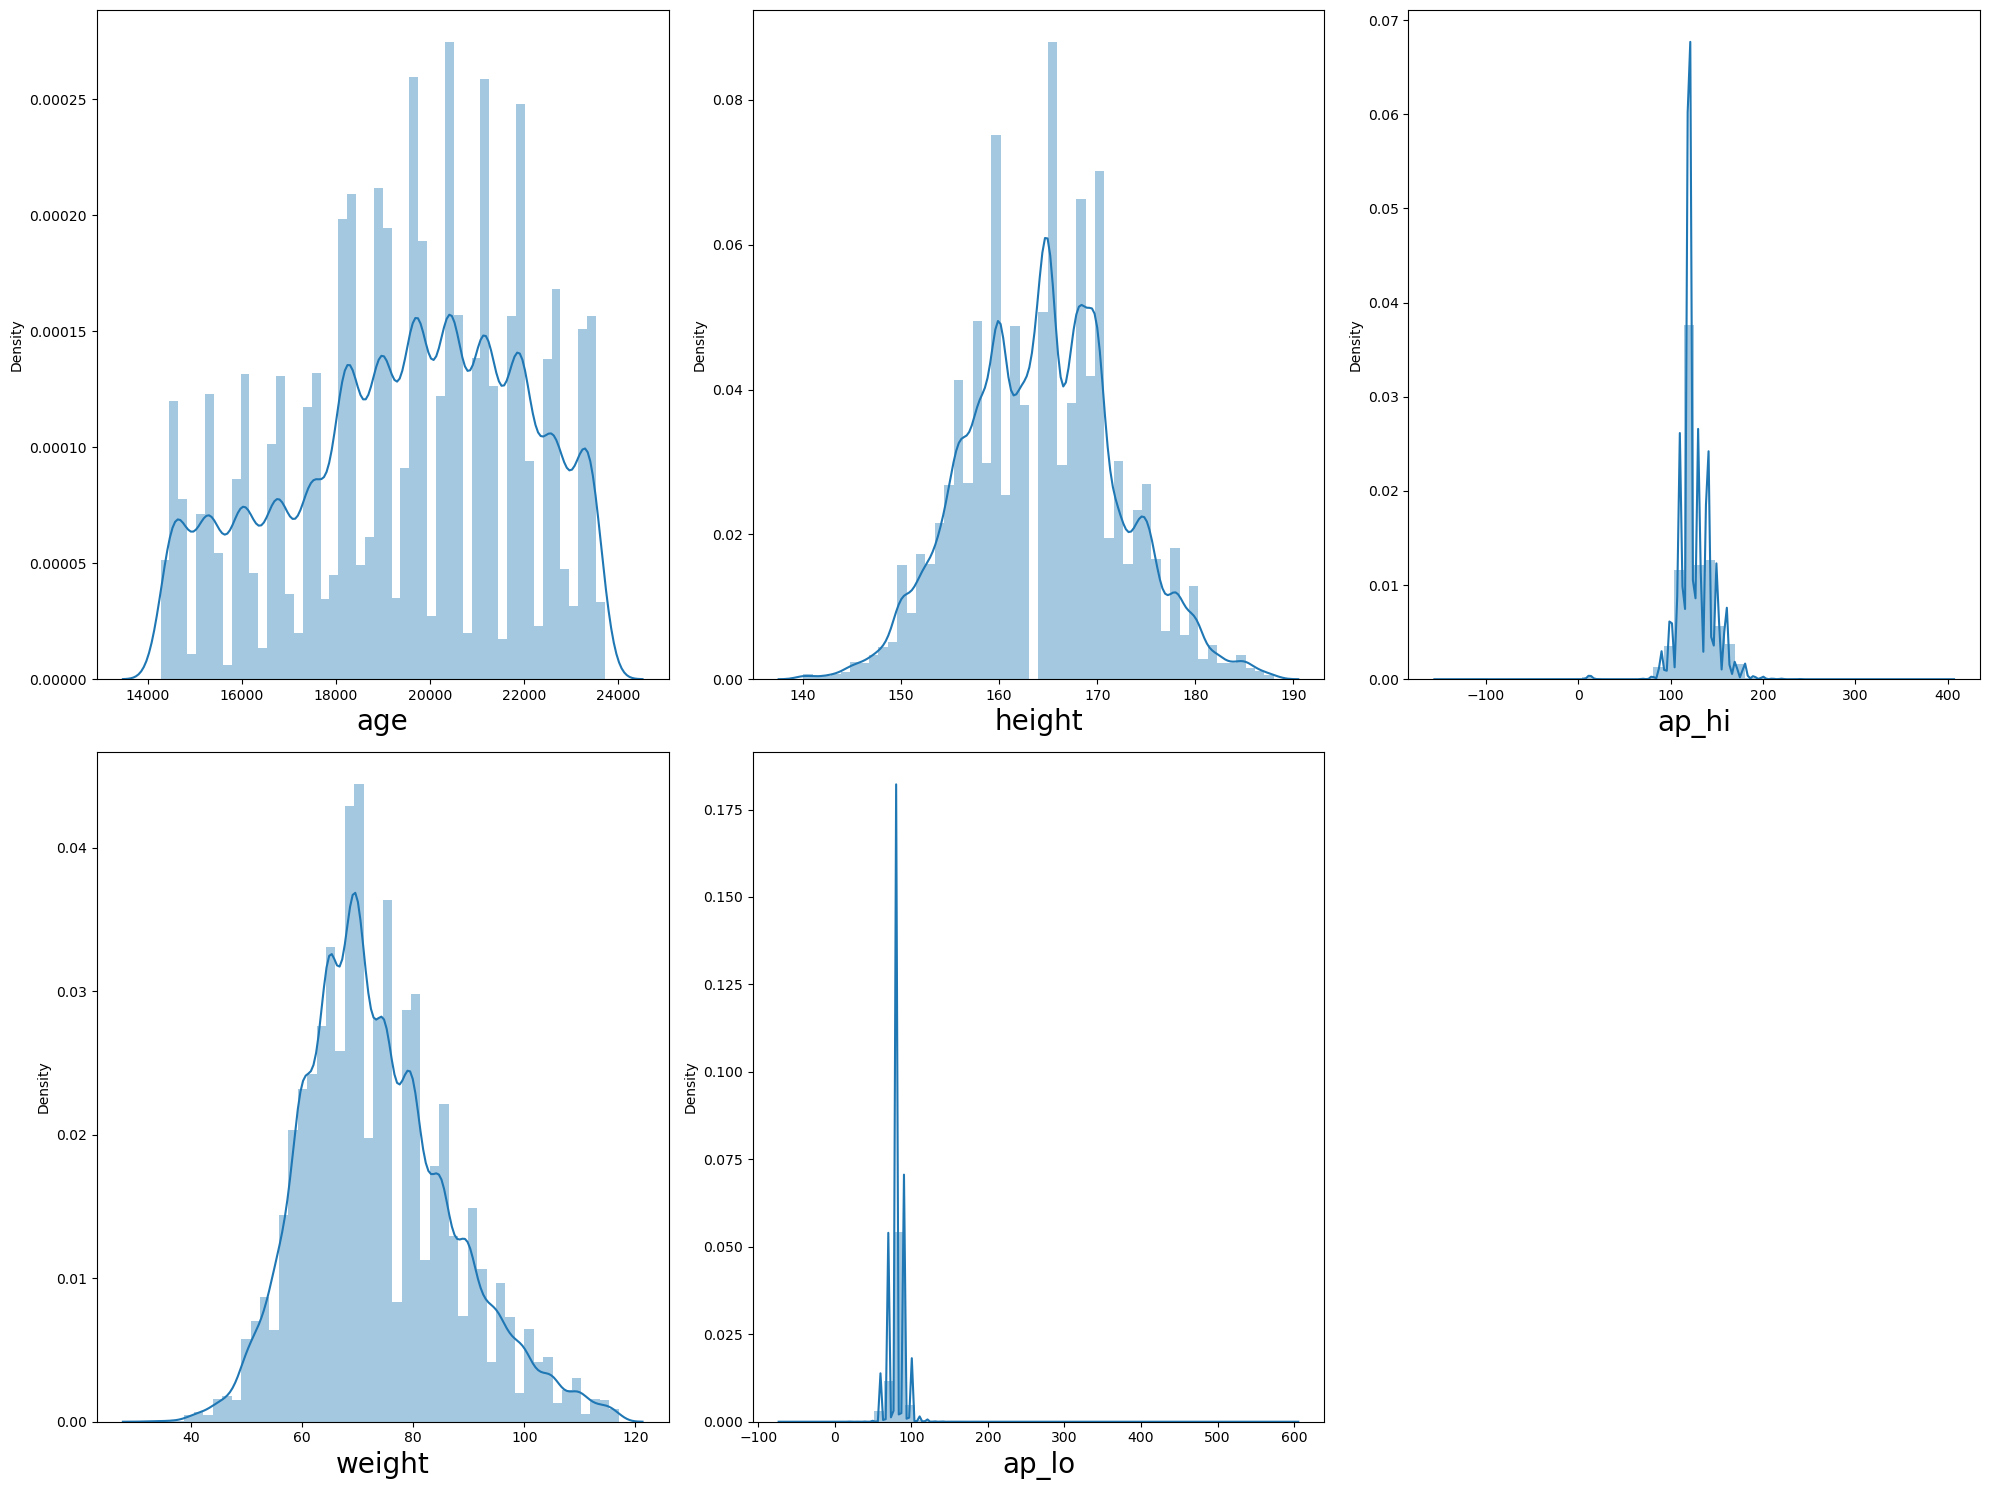

In [10]:
# Check how much skewness we removed

plt.figure(figsize=(20,15))
plotnumber = 1

for column in df[['age','height','ap_hi','weight','ap_lo']]:
    if plotnumber <= 6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.tight_layout()

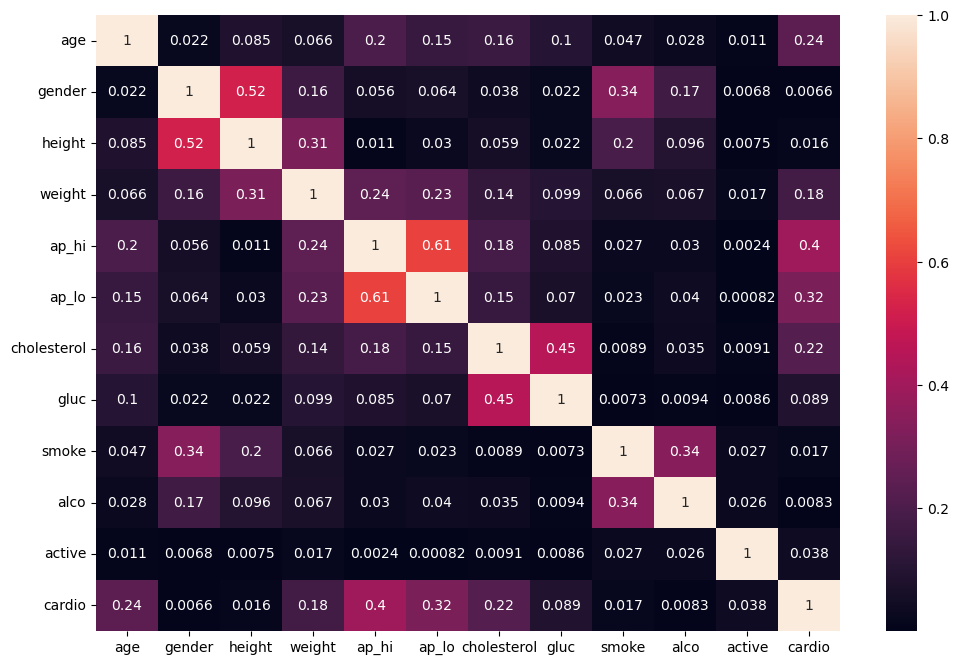

In [11]:
dff_corr = df.corr().abs()  # This will get the coefficient of one variable vs all other variable(Relationship)

plt.figure(figsize =(12,8))
sns.heatmap(dff_corr, annot = True, annot_kws ={'size':10})
plt.show()

seems like there is no multicollinearity issue.

In [12]:
X = df.drop(columns = ['cardio'])
y = df['cardio']

### Split into train test data set

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 41)

### Model confidence/accuracy

In [14]:
def metric_score(clf, x_train,x_test,y_train,y_test, train = True):
    if train:
        train_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        
        print(f"Accuracy Score: {accuracy_score(y_train,train_pred) * 100:.2f}%")
        
    elif train == False:
        test_pred = clf.predict(x_test)
        
        print('\n===============Test Result================')
        print(f"Accuracy Score: {accuracy_score(y_test,test_pred) * 100: .2f}%")
        
        print('\n \n test Classification report \n', classification_report(y_test, test_pred,digits = 2))

In [15]:
# Initiate DecisionTreeClassifier with new parameters and train
random_clf = RandomForestClassifier()

# Train the model
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
# Call the function and pass dataset to check train and test score

metric_score (random_clf,x_train,x_test,y_train,y_test,train = True)  # Training Score

metric_score (random_clf,x_train,x_test,y_train,y_test,train = False)  # Testing Score


===============Train Result===============
Accuracy Score: 99.98%

===============Test Result================
Accuracy Score:  71.53%

 
 test Classification report 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72     10243
           1       0.72      0.70      0.71      9965

    accuracy                           0.72     20208
   macro avg       0.72      0.72      0.72     20208
weighted avg       0.72      0.72      0.72     20208



### Let's Tune the parameters using GridSearchCV

In [17]:
# RandomForestClassifier
params = {'n_estimators':[13,15],
          'criterion':['entropy','gini'],
          'max_depth':[10,15],
          'min_samples_split':[10,11],
          'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(random_clf, param_grid = params)
grd.fit(x_train,y_train)

print('best_params = >', grd.best_params_)

best_params = > {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 15}


In [18]:
random_clf = grd.best_estimator_   # reinstantiating with best params

random_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=11, n_estimators=15)

In [19]:
# Call the function and pass dataset to check train and test score

metric_score (random_clf,x_train,x_test,y_train,y_test,train = True)  # Training Score

metric_score (random_clf,x_train,x_test,y_train,y_test,train = False)  # Testing Score


===============Train Result===============
Accuracy Score: 74.78%

===============Test Result================
Accuracy Score:  73.36%

 
 test Classification report 
               precision    recall  f1-score   support

           0       0.71      0.80      0.75     10243
           1       0.76      0.67      0.71      9965

    accuracy                           0.73     20208
   macro avg       0.74      0.73      0.73     20208
weighted avg       0.74      0.73      0.73     20208



# Our Model Score almost equal on both training and testing data